In [1]:
import efel

from bluepy.v2 import Simulation

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle


In [2]:
#/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/analysis/ina_atp_firing.py

#inasum with thal
df = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_inasum/atpFromINaVsMeanFreq_10percentCells.tsv',sep='\t',index_col=0)

#inasum no stim
#df = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_inasum_nostim/atpFromINaVsMeanFreq_10percentCells.tsv',sep='\t',index_col=0)



In [3]:
#inasum with thal
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_met_gen_inasum_2020120322.txt",header=None)

#inasum no stim
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_met_gen_inasum_nostim_2020120713.txt",header=None)

um_colnames = ["gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi","ksi_ephys"]
print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')

um = um.rename(columns={"with_met_gid":"gid",
                        "with_met_mpi_rank":"mpi_rank",
                        "with_met_idxm":"idxm"})

um.index = um['gid']

um_main = um[['gid','idxm','with_met_ATP_n']].copy()

um_main = um_main.loc[um_main['with_met_ATP_n'] != " nan",:]

um_main['with_met_ATP_n'] = um_main['with_met_ATP_n'].astype(float)

um_main = um_main.reset_index(drop=True)

um_main_g = um_main[['gid','with_met_ATP_n']].groupby('gid').mean()

um_main_g = um_main_g.reset_index()


40


In [4]:
#inasum with thal
params_from_ndam = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/param_p150_met_gen_inasum_2020120322.txt",header=None)

#inasum no stim
#params_from_ndam = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/param_p150_met_gen_inasum_nostim_2020120713.txt",header=None)


params_from_ndam_colnames = ['gid','rank','idxm','current_ina', 'const006', 'const_73', 'nais_mean', 'const139','current_ik', 'const41', 'pAKTPFK2', 'atpi_mean','constvm27','cais_mean','mito_scale','glutamatergic_gaba_scaling']

params_from_ndam.columns =  params_from_ndam_colnames


params_from_ndam['current_ina'] = params_from_ndam['current_ina'].astype(float)
params_from_ndam['atpi_mean'] = params_from_ndam['atpi_mean'].astype(float)
params_from_ndam['gid'] = params_from_ndam['gid'].astype(int)

params_from_ndam = params_from_ndam.dropna()

In [5]:
df = pd.merge(df,um_main_g, left_on='gid',right_on='gid',how='inner')

In [6]:
df = pd.merge(df,params_from_ndam, left_on='gid',right_on='gid',how='inner')

In [7]:
df.head()

gid  cells_volumes_um3   cells_areas         atp_1    inaSum_1  \
0  117683        3771.033248  11556.799461 -6.298591e+13 -262.053777   
1  117683        3771.033248  11556.799461 -6.298591e+13 -262.053777   
2  117683        3771.033248  11556.799461 -6.298591e+13 -262.053777   
3  117683        3771.033248  11556.799461 -6.298591e+13 -262.053777   
4  117683        3771.033248  11556.799461 -6.298591e+13 -262.053777   

          atp_2    inaSum_2         atp_3    inaSum_3  mean_frequency  ...  \
0 -7.872952e+13 -327.555268 -7.401318e+13 -307.932873       16.529483  ...   
1 -7.872952e+13 -327.555268 -7.401318e+13 -307.932873       16.529483  ...   
2 -7.872952e+13 -327.555268 -7.401318e+13 -307.932873       16.529483  ...   
3 -7.872952e+13 -327.555268 -7.401318e+13 -307.932873       16.529483  ...   
4 -7.872952e+13 -327.555268 -7.401318e+13 -307.932873       16.529483  ...   

             nais_mean  const139           current_ik const41  pAKTPFK2  \
0   14.024060336970281     139.0   0.9154585006681917     4.1      0.17   
1   14.706640299786969     139.0   0.7517437340193039     4.1      0.17   
2   14.736980255946042     139.0   1.0284004880396718     4.1      0.17   
3    14.75968165413566     139.0    7.116098411710115     4.1      0.17   
4   14.681621597119088     139.0    9.415794880793039     4.1      0.17   

  atpi_mean              constvm27                cais_mean  mito_scale  \
0  0.039799   0.039799048196019975   0.00010968461563248877    0.674419   
1  0.026097   0.026097474358694247   0.00012561829876931086    0.674419   
2  0.026590   0.026590278197457504    0.0001276738282573479    0.674419   
3  0.027643   0.027642793126068068   0.00011877305149178192    0.674419   
4  0.026002   0.026001671054206758    0.0001241866774894282    0.674419   

   glutamatergic_gaba_scaling  
0                         0.1  
1                         0.1  
2                         0.1  
3                         0.1  
4                         0.1  

[5 rows x 37 columns]

In [8]:
df['atp_1_PerVolume'] = df['atp_1']/df['cells_volumes_um3']
df['atp_2_PerVolume'] = df['atp_2']/df['cells_volumes_um3']
df['atp_3_PerVolume'] = df['atp_3']/df['cells_volumes_um3']

In [9]:
np.max(df['with_met_ATP_n'])

1.426199705697882

In [10]:
df['conc_atp_um_PerVolume'] = (np.max(df['with_met_ATP_n']) - df['with_met_ATP_n'])*(df['cells_volumes_um3']*1e-15)*6.02e23

In [11]:
df['conc_atp_1_PerVolume'] = (1.4 - df['atp_meanconc_1'])*(df['cells_volumes_um3']*1e-15)*6.02e23
df['conc_atp_2_PerVolume'] = (1.4 - df['atp_meanconc_2'])*(df['cells_volumes_um3']*1e-15)*6.02e23
df['conc_atp_3_PerVolume'] = (1.4 - df['atp_meanconc_3'])*(df['cells_volumes_um3']*1e-15)*6.02e23

In [12]:
np.corrcoef(df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'mean_frequency'],
            df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'conc_atp_um_PerVolume'].abs(),'spearman')


array([[1.       , 0.3846201],
       [0.3846201, 1.       ]])

In [13]:
np.corrcoef(df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'mean_frequency'],
            df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'current_ina'].abs(),'spearman')


array([[1.       , 0.2666566],
       [0.2666566, 1.       ]])

In [14]:
np.corrcoef(df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'mean_frequency'],
            df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'inaSum_1'].abs(),'spearman')


array([[1.        , 0.80541425],
       [0.80541425, 1.        ]])

In [15]:
np.corrcoef(df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'mean_frequency'],
            df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'conc_atp_1_PerVolume'].abs(),'spearman')


array([[1.        , 0.36318135],
       [0.36318135, 1.        ]])

In [16]:
np.corrcoef(df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'mean_frequency'],
            df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'atp_1_PerVolume'].abs(),'spearman')


array([[1.        , 0.67989253],
       [0.67989253, 1.        ]])

In [17]:
np.corrcoef(df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'mean_frequency'],
            df.loc[(df['mean_frequency']<100) & (df['etype']=='cADpyr'),'atp_1'].abs(),'spearman')


array([[1.        , 0.58257056],
       [0.58257056, 1.        ]])

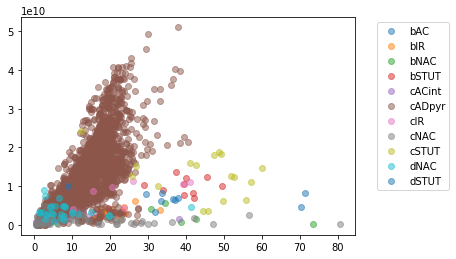

In [14]:
groups = df.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


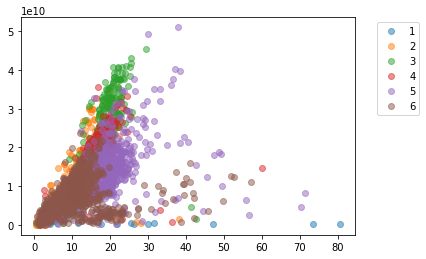

In [16]:
groups = df.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


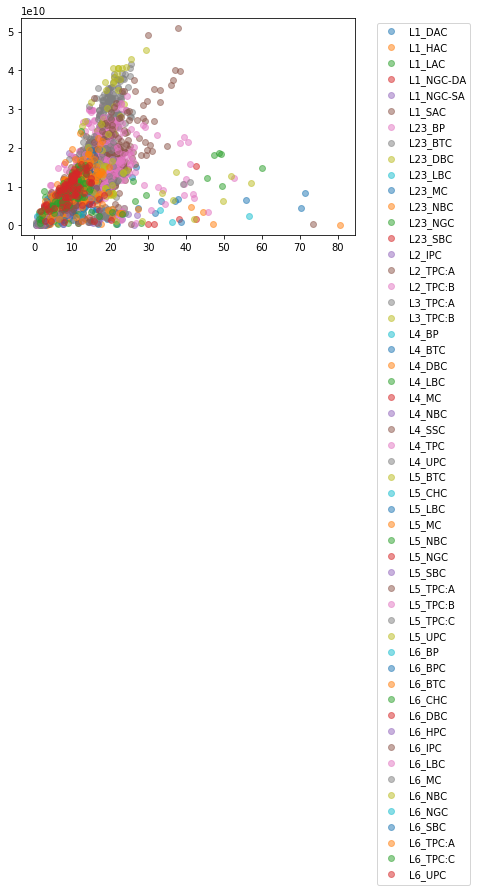

In [17]:
groups = df.groupby('mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


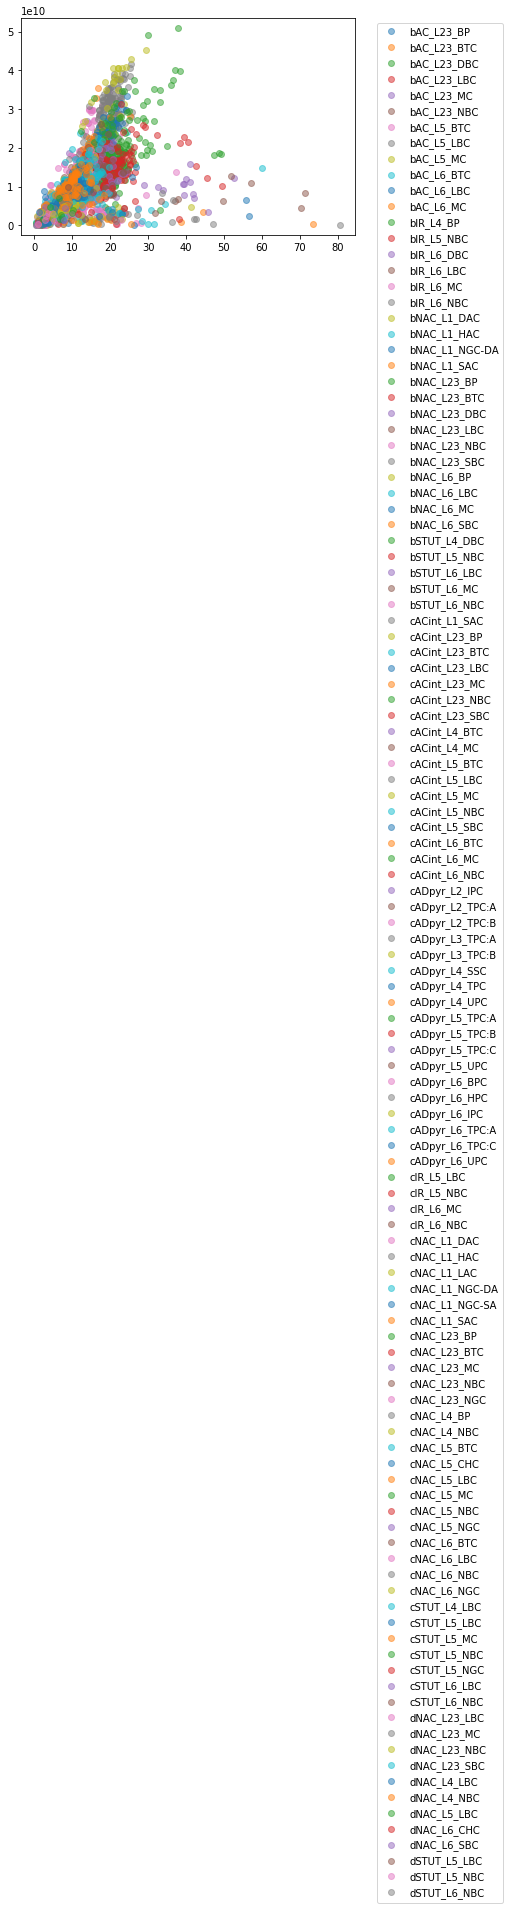

In [18]:
groups = df.groupby('etype_mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


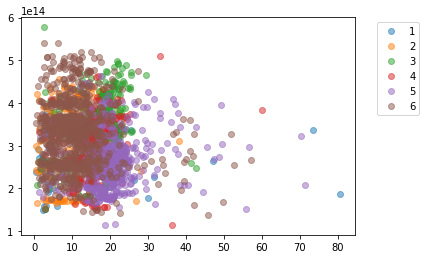

In [11]:
groups = df.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

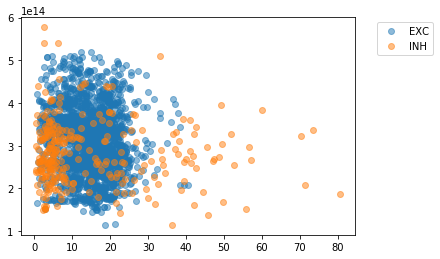

In [12]:
groups = df.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

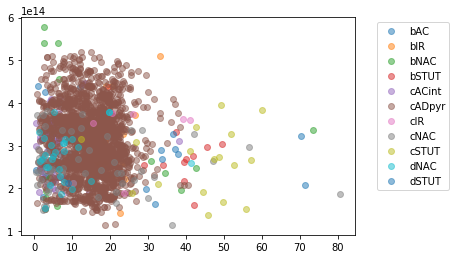

In [13]:
groups = df.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

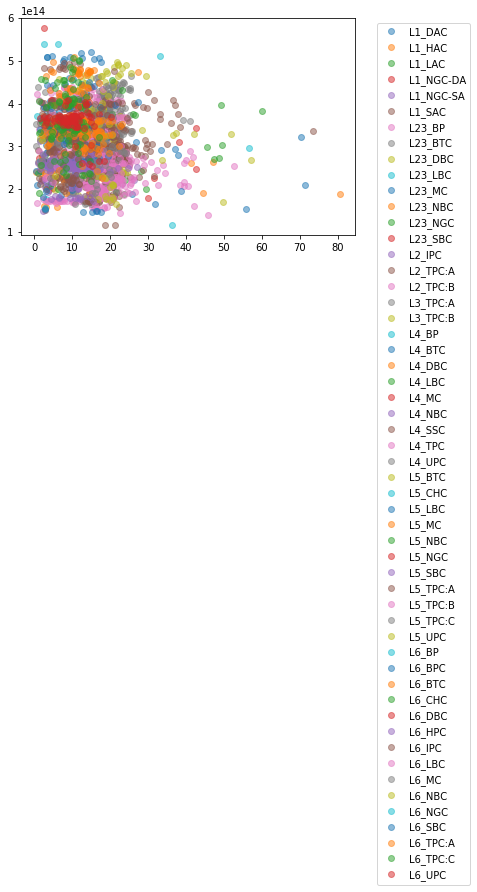

In [14]:
groups = df.groupby('mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1_PerVolume'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

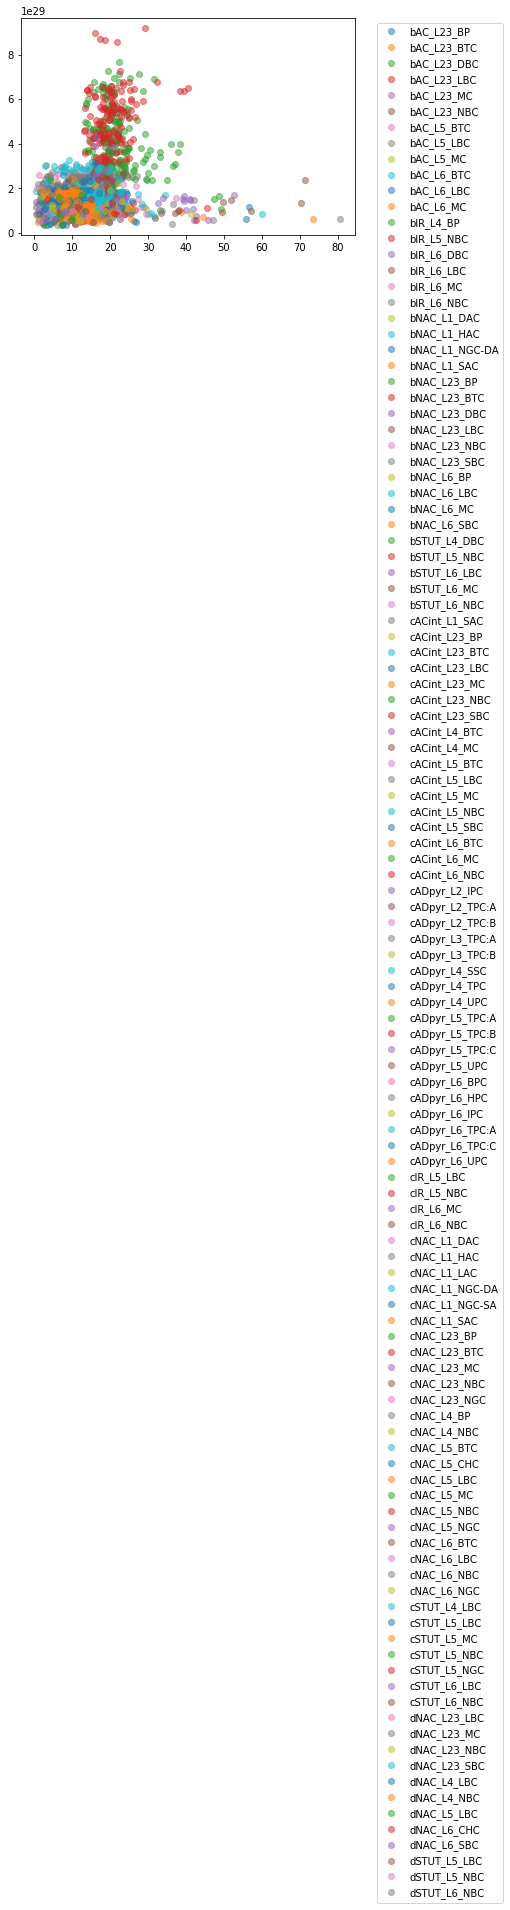

In [11]:
groups = df.groupby('etype_mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<100,'mean_frequency'], group.loc[group['mean_frequency']<100,'atp_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [21]:
np.corrcoef(df.loc[df['mean_frequency']<100,'mean_frequency'],df.loc[df['mean_frequency']<100,'atp_1'].abs(),'spearman')


array([[1.       , 0.4183058],
       [0.4183058, 1.       ]])

In [ ]:
# For every ATP molecule that the pump uses, three sodium ions are exported and two potassium ions are imported

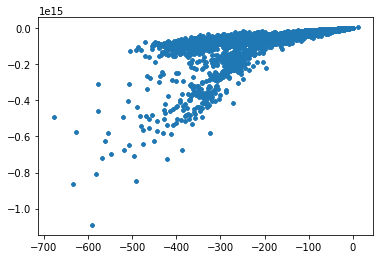

In [26]:
plt.plot(df['inaSum_1'],df['atp_1'], marker='.', linestyle='')

plt.show()

In [8]:
vols.index = vols['c_gid']

vols_coords = pd.merge(mc2_cells, vols, left_index=True,right_index=True, how='inner')


y_min_L1 = vols_coords.loc[vols_coords['layer']==1,'y'].min() 
y_max_L1 = vols_coords.loc[vols_coords['layer']==1,'y'].max()

y_min_L2 = vols_coords.loc[vols_coords['layer']==2,'y'].min() 
y_max_L2 = vols_coords.loc[vols_coords['layer']==2,'y'].max()

y_min_L3 = vols_coords.loc[vols_coords['layer']==3,'y'].min() 
y_max_L3 = vols_coords.loc[vols_coords['layer']==3,'y'].max()

y_min_L4 = vols_coords.loc[vols_coords['layer']==4,'y'].min() 
y_max_L4 = vols_coords.loc[vols_coords['layer']==4,'y'].max()

y_min_L5 = vols_coords.loc[vols_coords['layer']==5,'y'].min() 
y_max_L5 = vols_coords.loc[vols_coords['layer']==5,'y'].max()

y_min_L6 = vols_coords.loc[vols_coords['layer']==6,'y'].min() 
y_max_L6 = vols_coords.loc[vols_coords['layer']==6,'y'].max()

###

x_min_L1 = vols_coords.loc[vols_coords['layer']==1,'x'].min() 
x_max_L1 = vols_coords.loc[vols_coords['layer']==1,'x'].max()

x_min_L2 = vols_coords.loc[vols_coords['layer']==2,'x'].min() 
x_max_L2 = vols_coords.loc[vols_coords['layer']==2,'x'].max()

x_min_L3 = vols_coords.loc[vols_coords['layer']==3,'x'].min() 
x_max_L3 = vols_coords.loc[vols_coords['layer']==3,'x'].max()

x_min_L4 = vols_coords.loc[vols_coords['layer']==4,'x'].min() 
x_max_L4 = vols_coords.loc[vols_coords['layer']==4,'x'].max()

x_min_L5 = vols_coords.loc[vols_coords['layer']==5,'x'].min() 
x_max_L5 = vols_coords.loc[vols_coords['layer']==5,'x'].max()

x_min_L6 = vols_coords.loc[vols_coords['layer']==6,'x'].min() 
x_max_L6 = vols_coords.loc[vols_coords['layer']==6,'x'].max()

###

z_min_L1 = vols_coords.loc[vols_coords['layer']==1,'z'].min() 
z_max_L1 = vols_coords.loc[vols_coords['layer']==1,'z'].max()

z_min_L2 = vols_coords.loc[vols_coords['layer']==2,'z'].min() 
z_max_L2 = vols_coords.loc[vols_coords['layer']==2,'z'].max()

z_min_L3 = vols_coords.loc[vols_coords['layer']==3,'z'].min() 
z_max_L3 = vols_coords.loc[vols_coords['layer']==3,'z'].max()

z_min_L4 = vols_coords.loc[vols_coords['layer']==4,'z'].min() 
z_max_L4 = vols_coords.loc[vols_coords['layer']==4,'z'].max()

z_min_L5 = vols_coords.loc[vols_coords['layer']==5,'z'].min() 
z_max_L5 = vols_coords.loc[vols_coords['layer']==5,'z'].max()

z_min_L6 = vols_coords.loc[vols_coords['layer']==6,'z'].min() 
z_max_L6 = vols_coords.loc[vols_coords['layer']==6,'z'].max()

x_min_allL = vols_coords['x'].min()
x_max_allL = vols_coords['x'].max()

z_min_allL = vols_coords['z'].min()
z_max_allL = vols_coords['z'].max()

In [9]:
average_a = ((x_max_allL-x_min_allL)+(z_max_allL-z_min_allL))/2

In [10]:
vol_1 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L1-y_min_L1)
vol_2 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L2-y_min_L2)
vol_3 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L3-y_min_L3)
vol_4 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L4-y_min_L4)
vol_5 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L5-y_min_L5)
vol_6 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L6-y_min_L6)

In [11]:
santuy = pd.DataFrame(columns=['layer','percent'])
santuy = santuy.append({'layer':1,'percent':93.23}, ignore_index=True)
santuy = santuy.append({'layer':2,'percent':77.39}, ignore_index=True)
santuy = santuy.append({'layer':3,'percent':80.12}, ignore_index=True)
santuy = santuy.append({'layer':4,'percent':78.10}, ignore_index=True)
santuy = santuy.append({'layer':5,'percent':80.52}, ignore_index=True)
santuy = santuy.append({'layer':6,'percent':79.10}, ignore_index=True)
santuy

layer  percent
0    1.0    93.23
1    2.0    77.39
2    3.0    80.12
3    4.0    78.10
4    5.0    80.52
5    6.0    79.10

In [12]:
sum_vol_1 = np.sum(vols_coords.loc[vols_coords['layer']==1,'cells_volumes_um3'])
sum_vol_2 = np.sum(vols_coords.loc[vols_coords['layer']==2,'cells_volumes_um3'])
sum_vol_3 = np.sum(vols_coords.loc[vols_coords['layer']==3,'cells_volumes_um3'])
sum_vol_4 = np.sum(vols_coords.loc[vols_coords['layer']==4,'cells_volumes_um3'])
sum_vol_5 = np.sum(vols_coords.loc[vols_coords['layer']==5,'cells_volumes_um3'])
sum_vol_6 = np.sum(vols_coords.loc[vols_coords['layer']==6,'cells_volumes_um3'])

In [14]:
vols_coords_sum = pd.DataFrame(columns=['layer','sum_volume_um3'])

vols_coords_sum = vols_coords_sum.append({'layer':1,'sum_volume_um3':sum_vol_1}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':2,'sum_volume_um3':sum_vol_2}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':3,'sum_volume_um3':sum_vol_3}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':4,'sum_volume_um3':sum_vol_4}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':5,'sum_volume_um3':sum_vol_5}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':6,'sum_volume_um3':sum_vol_6}, ignore_index=True)

santuy_y = pd.merge(santuy,vols_coords_sum,left_on='layer',right_on='layer',how='inner')

santuy_y['cells_volumes_percent'] = None

santuy_y.loc[santuy_y['layer']==1,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==1,'sum_volume_um3']/vol_1
santuy_y.loc[santuy_y['layer']==2,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==2,'sum_volume_um3']/vol_2
santuy_y.loc[santuy_y['layer']==3,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==3,'sum_volume_um3']/vol_3
santuy_y.loc[santuy_y['layer']==4,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==4,'sum_volume_um3']/vol_4
santuy_y.loc[santuy_y['layer']==5,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==5,'sum_volume_um3']/vol_5
santuy_y.loc[santuy_y['layer']==6,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==6,'sum_volume_um3']/vol_6


santuy_y['y'] = None

santuy_y.loc[santuy_y['layer']==1,'y'] = 1
santuy_y.loc[santuy_y['layer']==2,'y'] = 2
santuy_y.loc[santuy_y['layer']==3,'y'] = 3
santuy_y.loc[santuy_y['layer']==4,'y'] = 4
santuy_y.loc[santuy_y['layer']==5,'y'] = 5
santuy_y.loc[santuy_y['layer']==6,'y'] = 6


In [15]:
santuy_y

layer  percent  sum_volume_um3 cells_volumes_percent  y
0    1.0    93.23    1.072083e+06               1.54092  1
1    2.0    77.39    2.145156e+07               30.5203  2
2    3.0    80.12    2.627310e+07                15.569  3
3    4.0    78.10    3.562039e+07               39.9832  4
4    5.0    80.52    1.559279e+08               63.9349  5
5    6.0    79.10    8.271679e+07                25.562  6

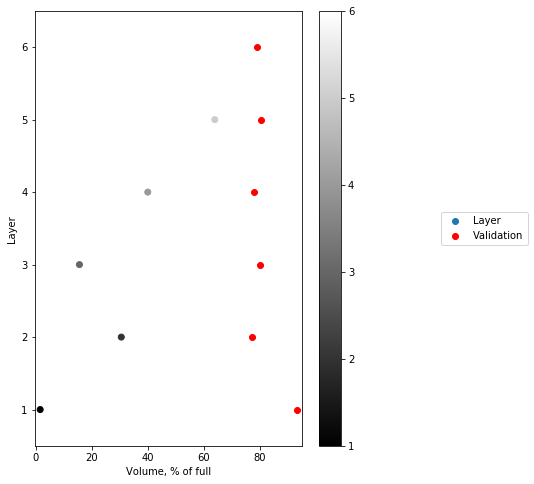

In [21]:
fig = plt.figure(figsize=(6, 8))


vmin=np.min(santuy_y['layer'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(santuy_y['layer'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())


#fig, ax = plt.subplots(figsize=(6, 8))

x_min = np.min(santuy_y['cells_volumes_percent'].tolist() + santuy_y['percent'].tolist() ) #mc2_cells[Cell.X].max()
x_max = np.max(santuy_y['cells_volumes_percent'].tolist() + santuy_y['percent'].tolist() ) #mc2_cells[Cell.X].min()

y_min = santuy_y['y'].min() 
y_max = santuy_y['y'].max()

#L1min = np.min(santuy_y.loc[santuy_y['layer']==1,'y'])
#L1max = np.max(santuy_y.loc[santuy_y['layer']==1,'y'])

#L2min = np.min(santuy_y.loc[santuy_y['layer']==2,'y'])
#L2max = np.max(santuy_y.loc[santuy_y['layer']==2,'y'])

#L3min = np.min(santuy_y.loc[santuy_y['layer']==3,'y'])
#L3max = np.max(santuy_y.loc[santuy_y['layer']==3,'y'])

#L4min = np.min(santuy_y.loc[santuy_y['layer']==4,'y'])
#L4max = np.max(santuy_y.loc[santuy_y['layer']==4,'y'])

#L5min = np.min(santuy_y.loc[santuy_y['layer']==5,'y'])
#L5max = np.max(santuy_y.loc[santuy_y['layer']==5,'y'])

#L6min = np.min(santuy_y.loc[santuy_y['layer']==6,'y'])
#L6max = np.max(santuy_y.loc[santuy_y['layer']==6,'y'])

#ax1 = plt.axhspan(L1min,L1max, color='#e5e5e5', label='L1', alpha=0.5,lw=0,zorder = 0)
#ax2 = plt.axhspan(L2min,L2max, color='#d8d8d8', label='L2', alpha=0.5,lw=0,zorder = 0)
#ax3 = plt.axhspan(L3min,L3max, color='#cccccc', label='L3', alpha=0.5,lw=0,zorder = 0)
#ax4 = plt.axhspan(L4min,L4max, color='#bfbfbf', label='L4', alpha=0.5,lw=0,zorder = 0)
#ax5 = plt.axhspan(L5min,L5max, color='#b2b2b2', label='L5', alpha=0.5,lw=0,zorder = 0)
#ax6 = plt.axhspan(L6min,L6max, color='#a6a6a6', label='L6', alpha=0.5,lw=0,zorder = 0)


ax1v = plt.scatter(santuy_y['cells_volumes_percent'], santuy_y['y'], c=santuy_y['layer'], vmin=vmin, vmax=vmax, cmap='gist_gray', label='Layer',zorder = 1) #cmap=cmap, 

axTheor = plt.scatter(santuy_y['percent'], santuy_y['y'], c='red',label='Validation',zorder = 2) #cmap=cmap, 



plt.ylabel('Layer')
#plt.ylabel('y (um)')
plt.xlabel('Volume, % of full')

plt.xlim([x_min - 2, x_max+2])
plt.ylim([y_min -0.5, y_max+0.5])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax1v)

plt.show()
#fig.savefig(f'plots/mc2_volumes_percent_withSantuy_30nov2020.png',dpi=300, bbox_inches='tight', transparent=True)


In [ ]:
fig = plt.figure(figsize=(6, 8))


vmin=np.min(vols_coords['layer'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(vols_coords['layer'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())


#fig, ax = plt.subplots(figsize=(6, 8))

x_min = np.min(vols_coords['cells_volumes_um3'].tolist()) #mc2_cells[Cell.X].max()
x_max = np.max(vols_coords['cells_volumes_um3'].tolist()) #mc2_cells[Cell.X].min()

y_min = mc2_cells[Cell.Y].min() 
y_max = mc2_cells[Cell.Y].max()

L1min = np.min(vols_coords.loc[vols_coords['layer']==1,'y'])
L1max = np.max(vols_coords.loc[vols_coords['layer']==1,'y'])

L2min = np.min(vols_coords.loc[vols_coords['layer']==2,'y'])
L2max = np.max(vols_coords.loc[vols_coords['layer']==2,'y'])

L3min = np.min(vols_coords.loc[vols_coords['layer']==3,'y'])
L3max = np.max(vols_coords.loc[vols_coords['layer']==3,'y'])

L4min = np.min(vols_coords.loc[vols_coords['layer']==4,'y'])
L4max = np.max(vols_coords.loc[vols_coords['layer']==4,'y'])

L5min = np.min(vols_coords.loc[vols_coords['layer']==5,'y'])
L5max = np.max(vols_coords.loc[vols_coords['layer']==5,'y'])

L6min = np.min(vols_coords.loc[vols_coords['layer']==6,'y'])
L6max = np.max(vols_coords.loc[vols_coords['layer']==6,'y'])

ax1 = plt.axhspan(L1min,L1max, color='#e5e5e5', label='L1', alpha=0.5,lw=0,zorder = 0)
ax2 = plt.axhspan(L2min,L2max, color='#d8d8d8', label='L2', alpha=0.5,lw=0,zorder = 0)
ax3 = plt.axhspan(L3min,L3max, color='#cccccc', label='L3', alpha=0.5,lw=0,zorder = 0)
ax4 = plt.axhspan(L4min,L4max, color='#bfbfbf', label='L4', alpha=0.5,lw=0,zorder = 0)
ax5 = plt.axhspan(L5min,L5max, color='#b2b2b2', label='L5', alpha=0.5,lw=0,zorder = 0)
ax6 = plt.axhspan(L6min,L6max, color='#a6a6a6', label='L6', alpha=0.5,lw=0,zorder = 0)

#ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
#ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
#ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
#ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
#ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
#ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 

axv = plt.scatter(vols_coords['cells_volumes_um3'], vols_coords['y'], c=vols_coords['layer'], vmin=vmin, vmax=vmax, label='Layer',zorder = 1) #cmap=cmap, 

plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('Volume (um^3)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+400])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()
#fig.savefig(f'plots/mc2_volumes_um3_30nov2020.png',dpi=300, bbox_inches='tight', transparent=True)


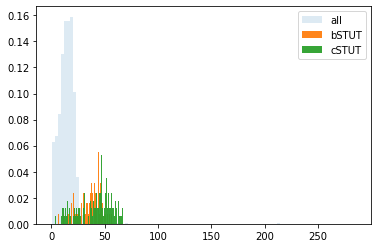

In [48]:
# gen met
bins = 100 #numpy.linspace(min(), 10, 100)

plt.hist(combo2['mean_frequency'], weights=np.ones(len(combo2['mean_frequency'])) / len(combo2['mean_frequency']), bins=bins, alpha=0.15, label='all')
plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

plt.legend(loc='upper right')
plt.show()

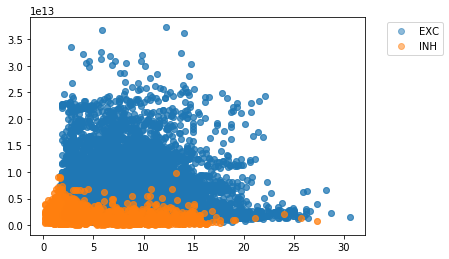

In [32]:
groups = combo3.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.deltaATPnumMolecules, marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [49]:
combo3.columns

Index(['deltaATPconc', 'x', 'y', 'z', 'synapse_class', 'etype', 'mtype',
       'me_combo', 'layer', 'morph_class', 'c_gid_x', 'rank_x', 'idxm',
       'current_ina', 'const006', 'const_73', 'nais_mean', 'const139',
       'current_ik', 'const41', 'pAKTPFK2', 'atpi_mean', 'constvm27',
       'cais_mean', 'mito_scale', 'glutamatergic_gaba_scaling',
       'with_met_ATP_n', 'mean_frequency', 'c_gid_y', 'rank_y',
       'cells_volumes_um3', 'cells_areas', 'deltaATPnumMolecules'],
      dtype='object')

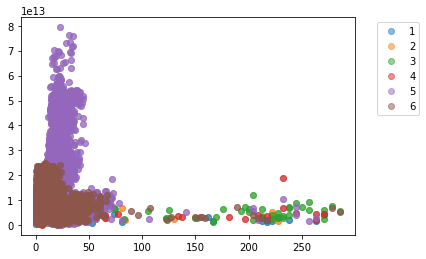

In [47]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMoleculesArea'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

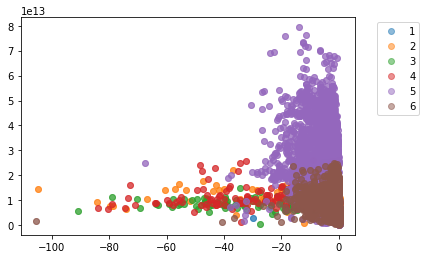

In [48]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'deltaATPnumMoleculesArea'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

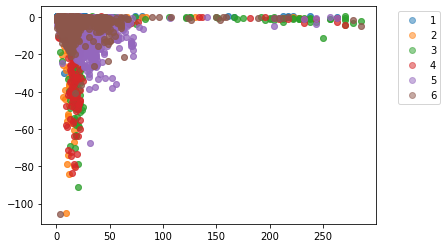

In [57]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'current_ina'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

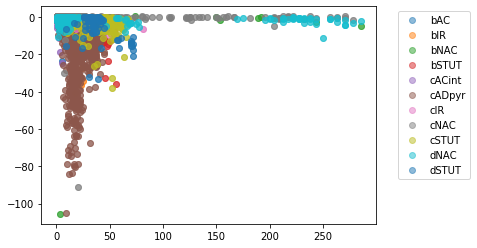

In [58]:
groups = combo3.loc[combo3['idxm']==0].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'current_ina'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

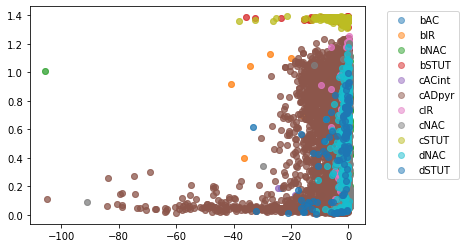

In [59]:
groups = combo3.loc[combo3['idxm']==0].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

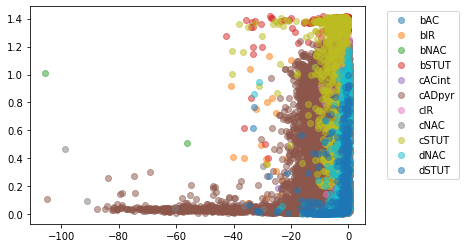

In [74]:
groups = combo3.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

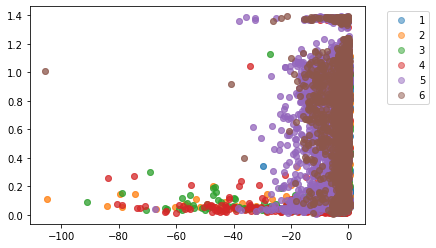

In [60]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

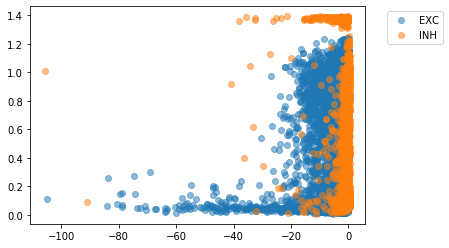

In [73]:
groups = combo3.loc[combo3['idxm']==0].groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

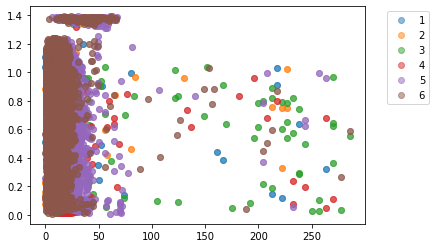

In [56]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

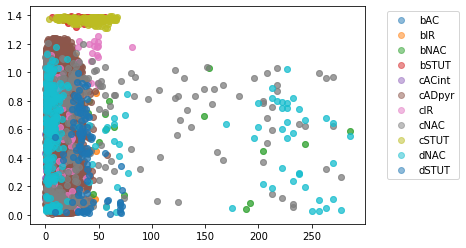

In [55]:
groups = combo3.loc[combo3['idxm']==0].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

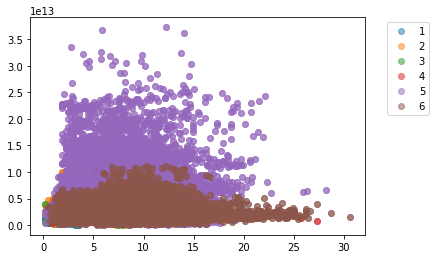

In [33]:
groups = combo3.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [56]:
combo3.columns

Index(['deltaATPconc', 'x', 'y', 'z', 'synapse_class', 'etype', 'mtype',
       'me_combo', 'layer', 'c_gid_x', 'mean_frequency', 'c_gid_y', 'rank',
       'cells_volumes_um3', 'cells_areas', 'deltaATPnumMolecules'],
      dtype='object')

In [61]:
combo3['etype_mtype'] = combo3['etype'].astype(str) + "_" + combo3['mtype'].astype(str)

In [62]:
len(combo3['etype_mtype'].unique())

202

In [36]:
len(onepercent_gids)

230

In [38]:
len(combo3)

45772

In [63]:
combo3 = combo3.drop_duplicates(keep='first')
len(combo3)

113545

In [64]:
combo1per = combo3.loc[combo3.index.isin(onepercent_gids)]
len(combo1per)

1130

In [ ]:
combo1per['atpi_mean']

In [68]:
combo1per = combo1per.loc[combo1per['idxm']==0,:]

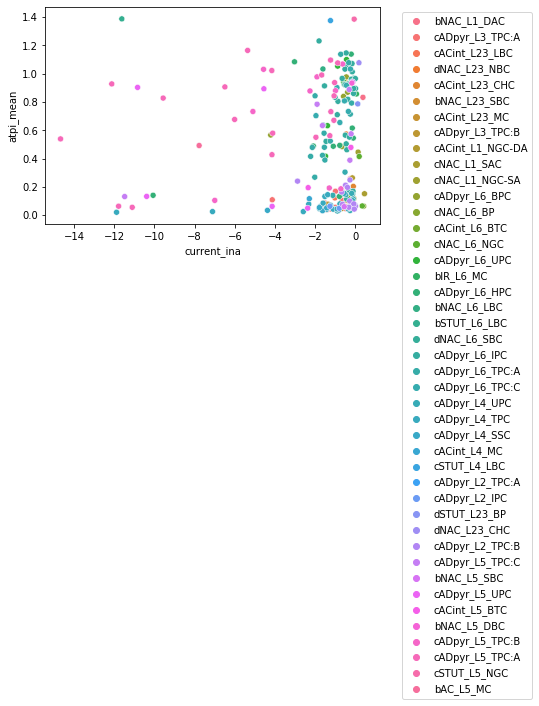

In [71]:
color_labels = combo1per['etype_mtype'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("flare", len(color_labels)).as_hex()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

#plt.plot(combo3.loc[:,'mean_frequency'], combo3.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, alpha=0.5, c=combo3['etype_mtype'].map(color_map))


ax = sns.scatterplot(data = combo1per.loc[combo1per['current_ina']>-15,:], x='current_ina',y='atpi_mean',hue='etype_mtype') #,palette='flare'


#groups = combo3.groupby('etype_mtype')
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in groups:
#    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

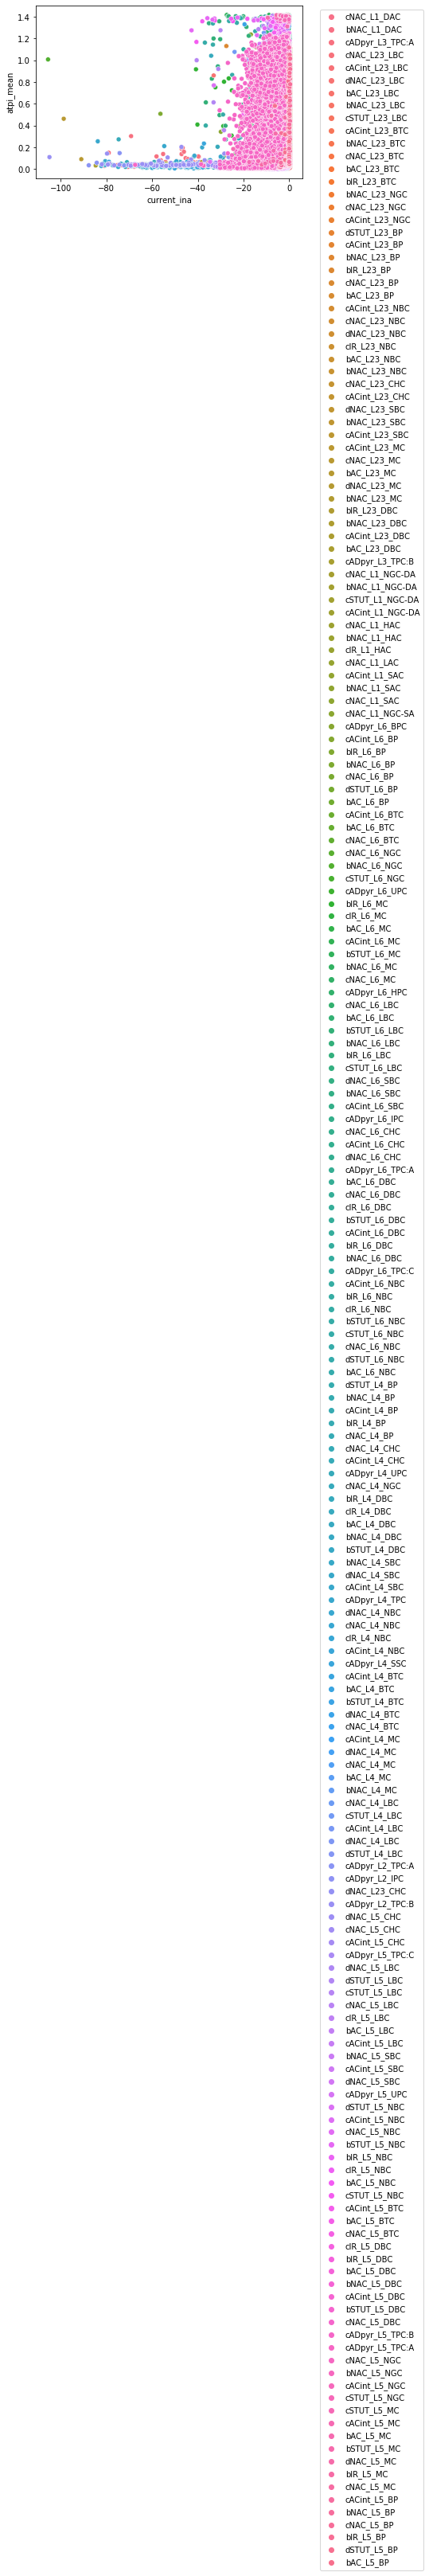

In [75]:
color_labels = combo3['etype_mtype'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("flare", len(color_labels)).as_hex()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

#plt.plot(combo3.loc[:,'mean_frequency'], combo3.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, alpha=0.5, c=combo3['etype_mtype'].map(color_map))


ax = sns.scatterplot(data = combo3, x='current_ina',y='atpi_mean',hue='etype_mtype') #,palette='flare'


#groups = combo3.groupby('etype_mtype')
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in groups:
#    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

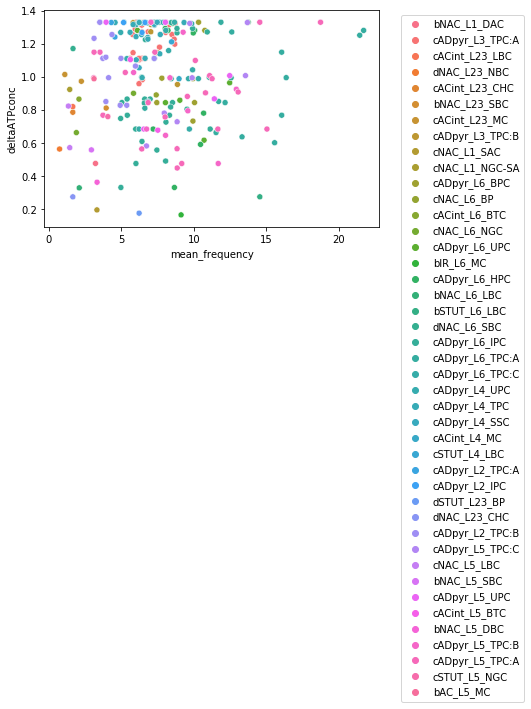

In [46]:
color_labels = combo1per['etype_mtype'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("flare", len(color_labels)).as_hex()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

#plt.plot(combo3.loc[:,'mean_frequency'], combo3.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, alpha=0.5, c=combo3['etype_mtype'].map(color_map))


ax = sns.scatterplot(data = combo1per, x='mean_frequency',y='deltaATPconc',hue='etype_mtype') #,palette='flare'


#groups = combo3.groupby('etype_mtype')
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in groups:
#    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

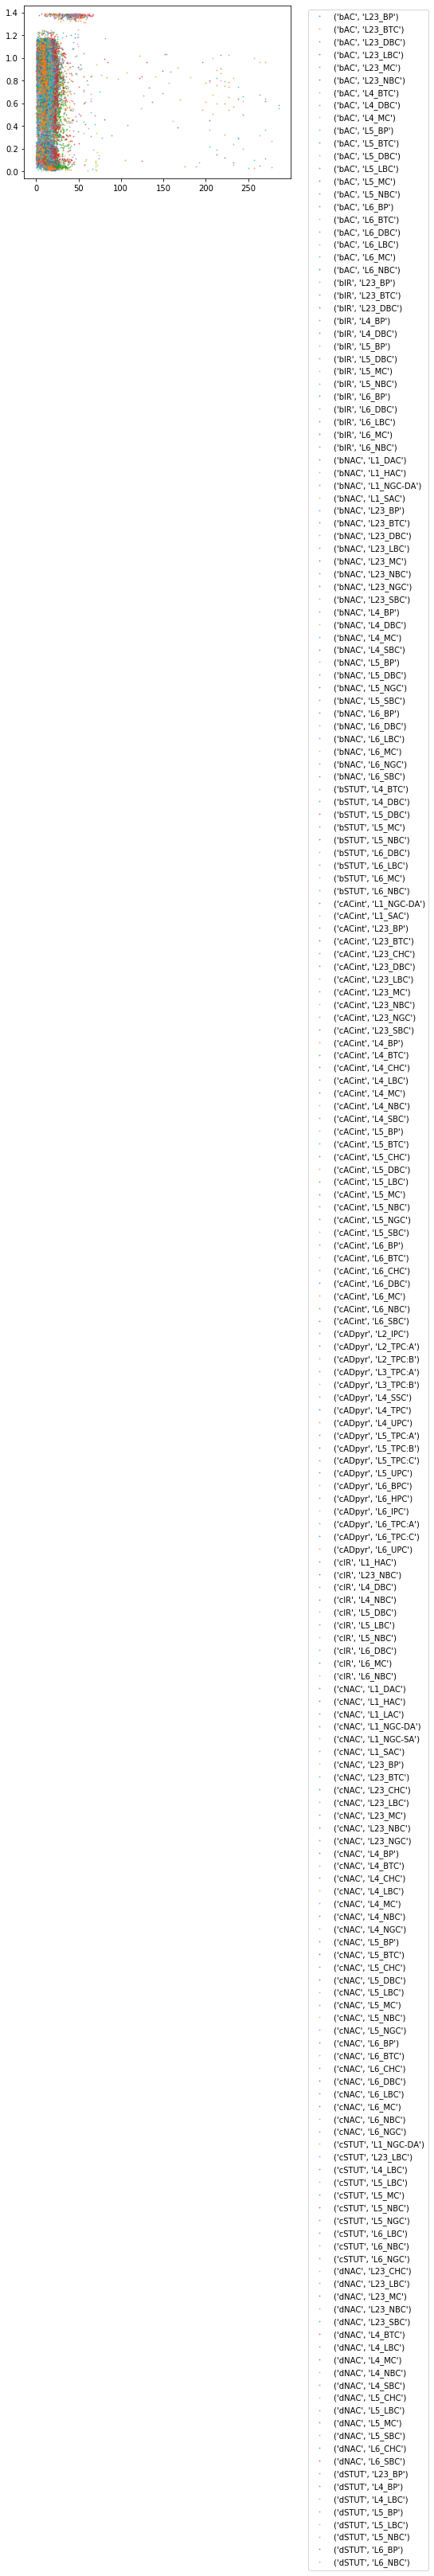

In [79]:
groups = combo3.loc[combo3['idxm']==0].groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

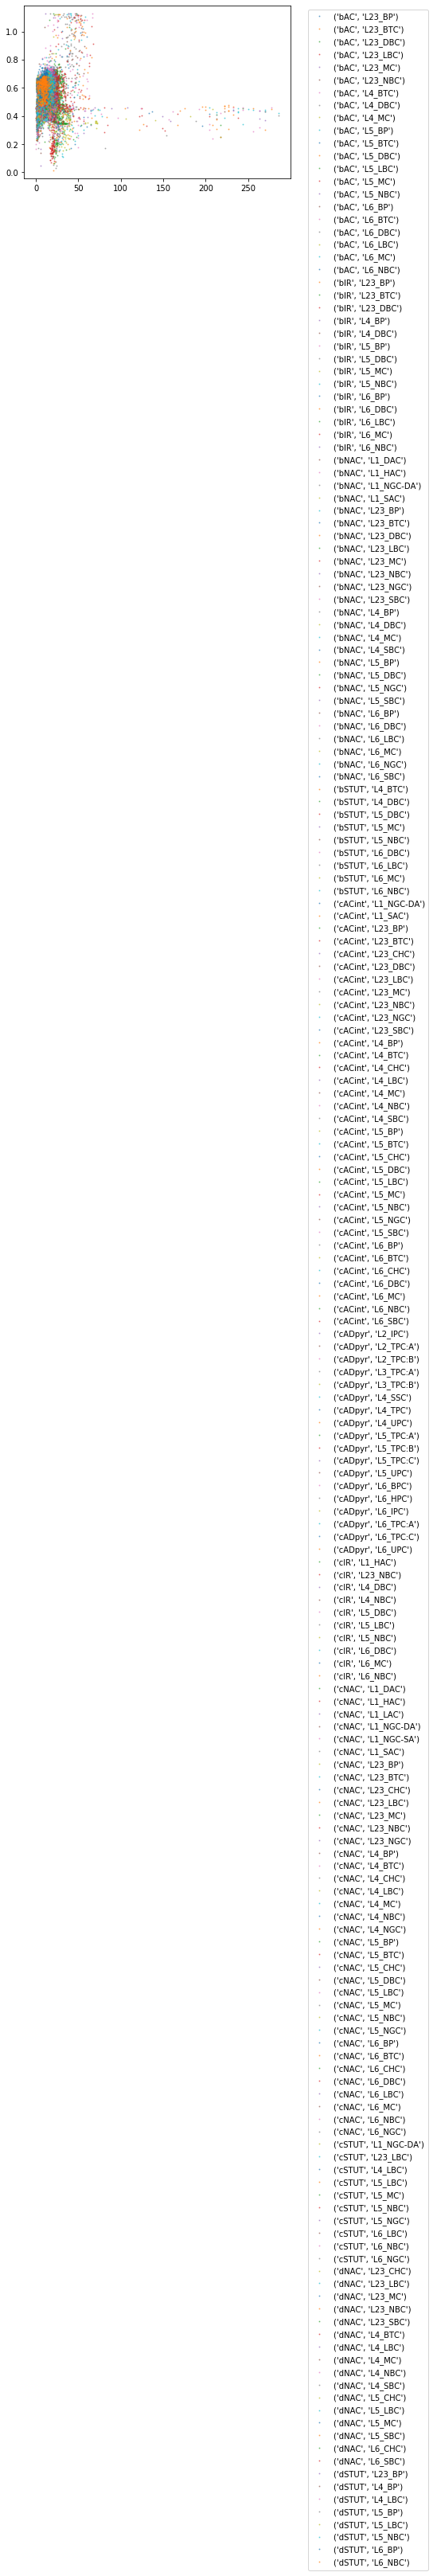

In [80]:
groups = combo3.loc[combo3['idxm']==0].groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

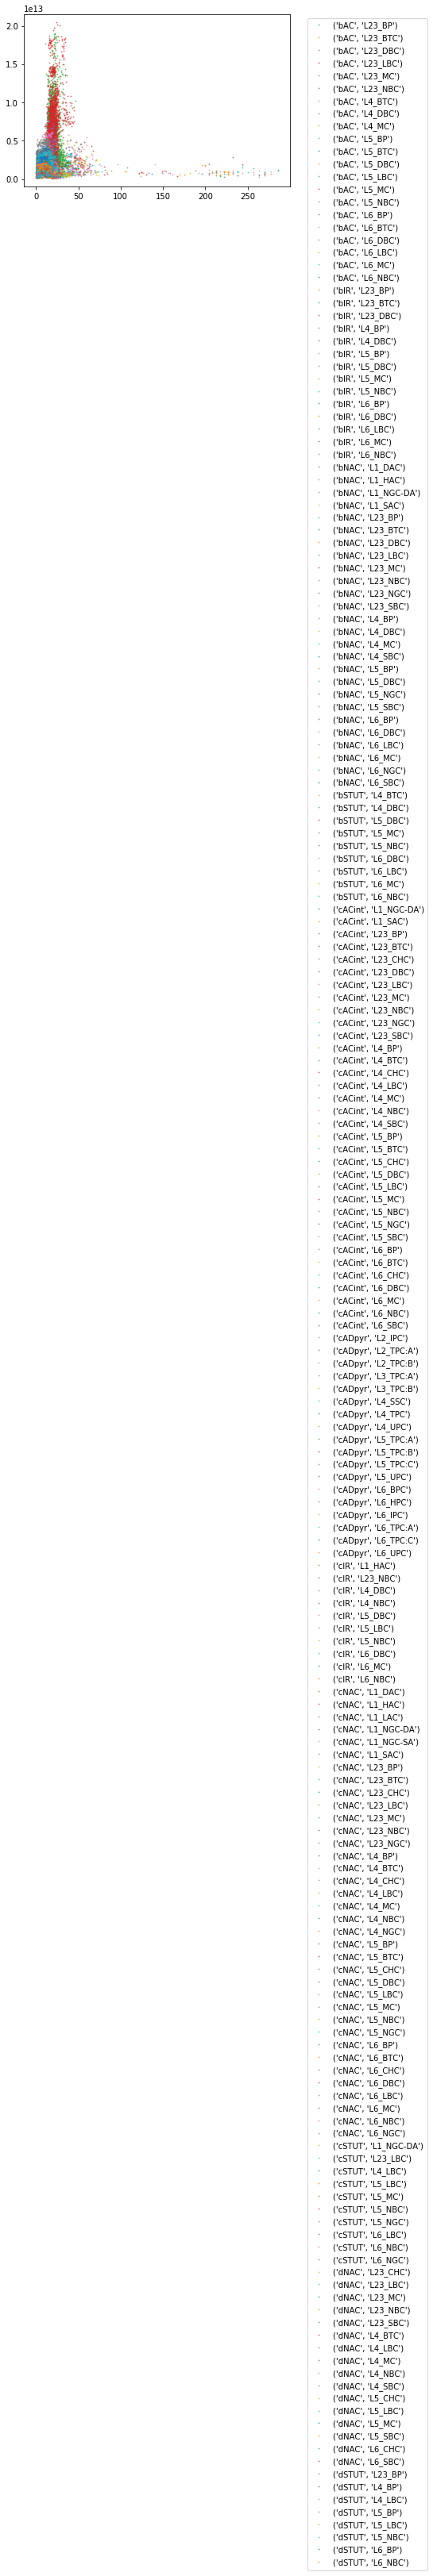

In [78]:
groups = combo3.loc[combo3['idxm']==0].groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

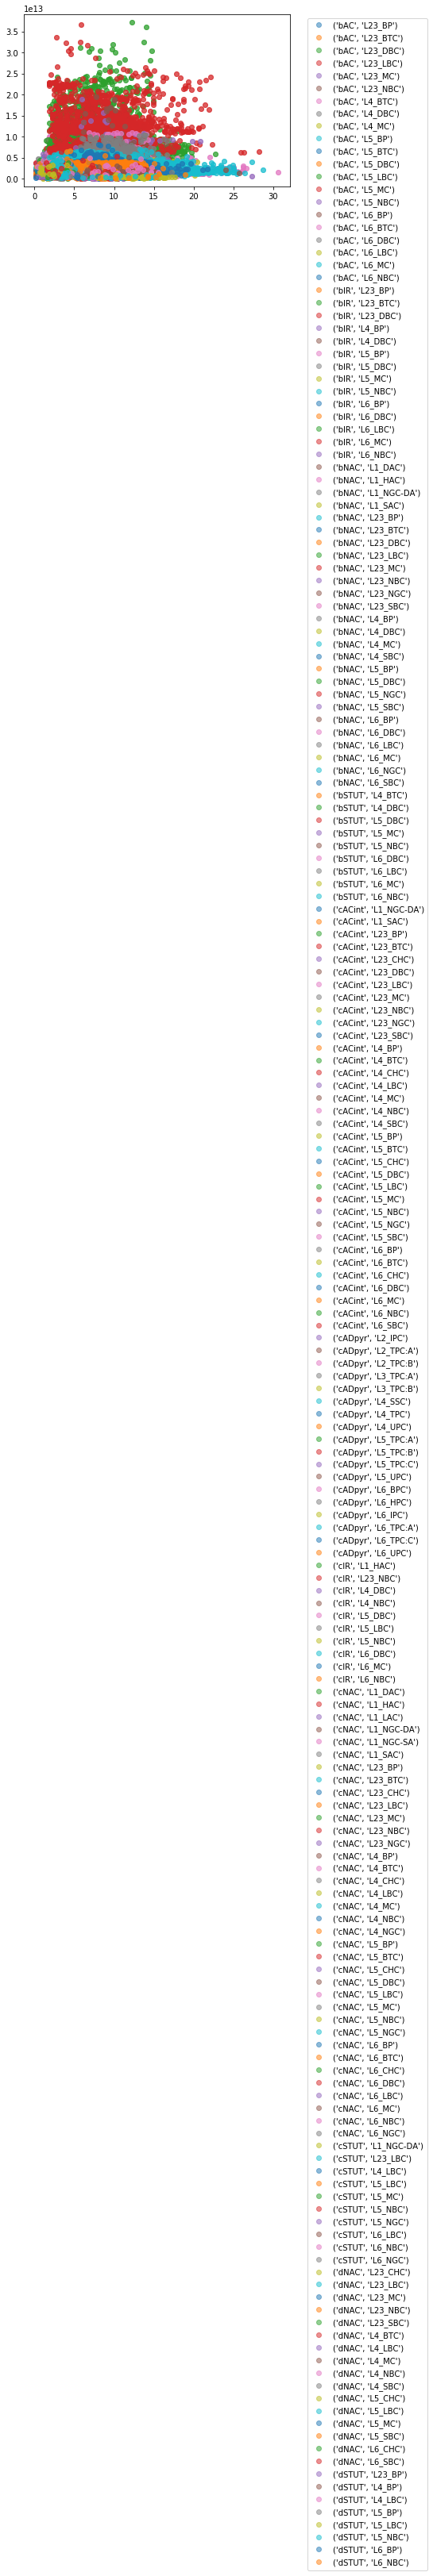

In [55]:
groups = combo3.groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [45]:
combo3.loc[(combo3['mtype']=='L5_MC'),'etype'].unique()

[cSTUT, cACint, bAC, bSTUT, dNAC, bIR, cNAC]
Categories (7, object): [cSTUT, cACint, bAC, bSTUT, dNAC, bIR, cNAC]

In [37]:
combo3.columns

Index(['deltaATPconc', 'x', 'y', 'z', 'synapse_class', 'etype', 'mtype',
       'me_combo', 'layer', 'c_gid_x', 'mean_frequency', 'c_gid_y', 'rank',
       'cells_volumes_um3', 'cells_areas', 'deltaATPnumMolecules'],
      dtype='object')

In [39]:
c.cells.available_properties

{'etype',
 'layer',
 'me_combo',
 'morph_class',
 'morphology',
 'mtype',
 'orientation',
 'region',
 'synapse_class',
 'x',
 'y',
 'z'}

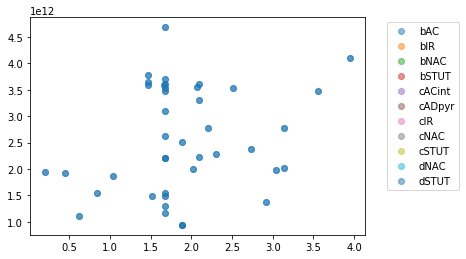

In [54]:
groups = combo3.loc[(combo3['etype']=='bAC') & (combo3['mtype']=='L5_MC'),:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [47]:
np.corrcoef(combo3.loc[(combo3['etype']=='bAC') & (combo3['mtype']=='L5_MC'),'mean_frequency'], combo3.loc[(combo3['etype']=='bAC') & (combo3['mtype']=='L5_MC'),'deltaATPnumMolecules'],'spearman')


array([[1.        , 0.23182497],
       [0.23182497, 1.        ]])

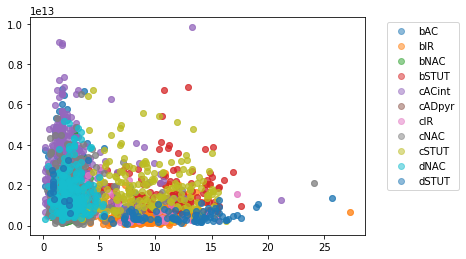

In [102]:
groups = combo3.loc[combo3['etype']!='cADpyr'].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

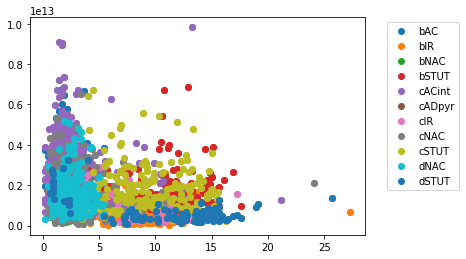

In [100]:
groups = combo3.loc[combo3['etype']!='cADpyr'].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

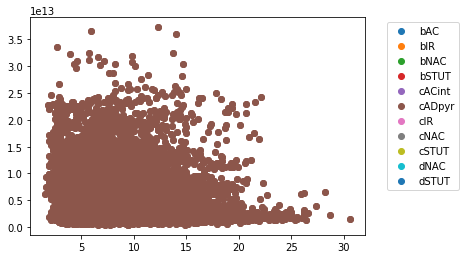

In [101]:
groups = combo3.loc[combo3['etype']=='cADpyr'].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()